# Overview

This week is all about working with data. I'm not going to lie to you. This part might be frustrating - but frustration is an integral part of learning. Real data is almost always messy & difficult ... and learning to deal with that fact, is a key part of being a data scientist. 


Enough about the process, let's get to the content. 

![Text](https://raw.githubusercontent.com/suneman/socialgraphs2025/main/files/rock.png "Great image choice, Sune")

Today, we will use network science and Wikipedia to learn about the relationships of **[Rock Bands & Performers](https://en.wikipedia.org/wiki/List_of_mainstream_rock_performers)**. 

To create the network, we will download the Wikipedia pages for all people in the list. Next, we create the network of the pages that link to each other. We can do this because wikipedia pages link to one another. So [The Beatles](https://en.wikipedia.org/wiki/The_Beatles) links to [the Kinks](https://en.wikipedia.org/wiki/The_Kinks), for example.

Next time, we'll use our network skills (as well as new ones) to understand that network. Further down the line, we'll use natural language processing to extract information from the text displayed on those pages.

But for today, the tasks are:

* Learn about regular expressions.
* Download and store (for later use) all the performer-pages from Wikipedia.
* Extract all the internal wikipedia-links that connect the performers on Wikipedia.
* Generate the network of performers on wikipedia.
* Calculate some simple network statistics.
* Create a simple plot

---

# Prelude: Regular expressions

Before we get started, we have to get a little head start on the _Natural Language Processing_ part of the class. This is a new direction for us. Up to now, we've mostly been doing math-y stuff with Python, but today, we're going to be using Python to work through a text. The central thing we need to be able to do today, is to extract internal wikipedia links (links between wiki-pages). And for that we need regular expressions.

<div class="alert alert-block alert-info">
The recipe below is what I told the class to do before LLMs. If you want to try to learn about regular expressions on your own, that's what you need to do. <b>BUT!</b> You don't have to. <b>For this part, it's OK to use an LLM to help you as much as you possibly can.</b> The reason I'm saying this is that I don't think having an intimate knowledge of regular expressions is important for the content of this class.
</div>
<div class="alert alert-block alert-info">
That said, <b>using an LLM means that you have to do extra checking and testing</b>. Make sure that the code you get from your LLM actually does what you asked it to do by going through some examples and manually checking (use a real wiki page or the test-text below). If your LLM hallucinated the wrong answer and you still use the data that comes out, it will count negatively in our evaluations.
</div>

> *Reading/Video*
> * Read [**this tutorial**](https://developers.google.com/edu/python/regular-expressions) to form an overview of regular expressions. This is important to understand the content of the tutorial (also very useful later), so you may actually want to work through the examples. 
> * (**Experiment**: An alternative to reading. If you love videos more than reading, you can also check out [this YouTube explainer video](https://www.youtube.com/watch?v=rhzKDrUiJVk) instead of going through the tutorial above -- it's a friendly looking young man called Kyle who goes through RegExps from his bedroom. I haven't watched the whole thing ... since I personally don't like video explainers ... but it has many views + thumbs up.)

> _Exercises_: Regular expressions round 1\.
> * Now, explain in your own words: what are regular expressions?
> * Provide an example of a regex to match 4 digits numbers (by this, I mean precisely 4 digits, you should not match any part of numbers with e.g. 5 digits). In your notebook, use `findall` to show that your regex works on this [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt). **Hint**: a great place to test out regular expressions is: https://regex101.com.
> * Provide an example of a regex to match words starting with "super". Show that it works on the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt).
> 

Now we can go on to figure out how how to match internal wiki links. Wiki links come in two flavors. They're always enclosed in double square brackets, e.g. `[[wiki-link]]` and can either occur like this:

    ... some text [[Aristotle]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/Aristotle`](https://en.wikipedia.org/wiki/Aristotle). 

The second flavor has two parts, so that links can handle spaces and other more fancy forms of references, here's an example:

    ... some text [[John_McCain|John McCain]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/John_McCain`](https://en.wikipedia.org/wiki/John_McCain). Now it's your turn.

> _Exercise_: Regular expressions round 2\. Show that you can extract the wiki-links from the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2022/master/files/regex_exercise.txt). Perhaps you can find inspiration on stack overflow or similar. **Hint**: Try to solve this exercise on your own (that's what you will get the most out of - learning wise), but if you get stuck ... you will find the solution in one of the video lectures below.
> 

In [1]:
import re

with open("C:\\Users\\Jacob pc\\vscode_projects\\socialgraphs2025\\lectures\\testtekst.txt", "r", encoding="utf-8") as file:
    text = file.read()

strings = re.findall(r'super', text)

---

# Part 1: Download the Wikipedia pages of characters

It's time to download all of the pages of the characters. Use your experience with APIs from Week 1\. To get started, I **strongly** recommend that you re-watch the **APIs video lecture** from that week - it contains lots of useful tips on this specific activity (yes, I had planned this all along!). I've included it below for your covenience.

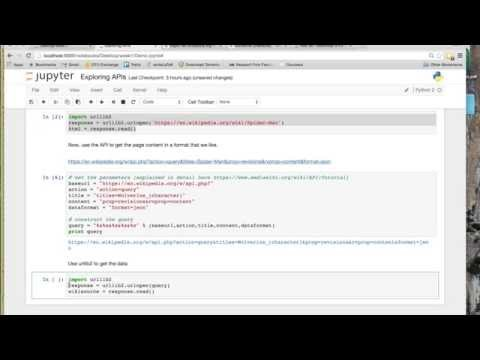

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("9l5zOfh0CRo",width=800, height=450)

Now, it's time to go and get the names of all the wiki pages you'll need for your analysis. Those will serve as the nodes in our network. 

*Exercise*
> * Go to the page https://en.wikipedia.org/wiki/List_of_mainstream_rock_performers and extract all of the artist-links using your regular expressions from above.
>   * Hint: To make this easier, you can simply hit the edit button on wikipedia, copy the entire content of the file to a plain text file on your computer and manually delete all of the markup that's not related to the artists' names. (Otherwise there are some wiki-links there that you don't want)

<div class="alert alert-block alert-info">
Again, it's OK to use an LLM as much as you can here. But you should double check that it actually does what you want and all that stuff.
</div>

#### A note to the perfectionists out there
The files contain names and corresponding wiki-link, but pages can be missing or redirected. If you encounter re-directs, you can follow the redirect link and see if you can recover a page that's not already in your database.  (But you do not have to do that either - it's fine to just skip ... many new issues can arise if you try to follow the redirects).

#### Back to our regularly scheduled programming

With the list from the exercise above, you now have all of the nodes in the network.

*Exercise*

> * Use your knowledge of APIs and the list of all the wiki-pages to download all the text on the pages of the country performers. 
>   - Hint 0: Make sure you read the [Wiki API pages](https://www.mediawiki.org/wiki/API:Main_page) to ensure that your **download the cleanest possible version of the page (the wikitext)**. [This link](https://stackoverflow.com/questions/55779015/get-wikitext-from-wikipedia-api) may be helpful.
>   - Hint 1: You may want to save the individual band/artist pages on your computer. You can use your skills from the first lectures to write them as plain-text files (that's what I would do - one file per band/artist, named according to its wiki-link). (But you can also use pickle files or start a database if you like that better.)
>   - Hint 2: If you now have a directory with all those files, you can use [`os.listdir()`](https://www.geeksforgeeks.org/python-os-listdir-method/) to list all the files in that directory within Python and iterate over the files if you need to.
>   - Hint 3: Don't forget to add underscores to the performer names when you construct the urls

<div class="alert alert-block alert-info">
Again, it's OK to use an LLM here.
</div>

In [2]:
# chatgpt helped with this code

import requests, re, time, os
from pathlib import Path

UA = "s181487/1.0 (mailto:s181487@student.dtu.dk)"
API = "https://en.wikipedia.org/w/api.php"

session = requests.Session()
session.headers.update({"User-Agent": UA})

def wikitext(title: str) -> str:
    r = session.get(API, params={
        "action":"query","prop":"revisions","rvprop":"content","rvslots":"main",
        "format":"json","titles":title
    }, timeout=30)
    page = next(iter(r.json()["query"]["pages"].values()))
    return page.get("revisions",[{"slots":{"main":{"*":""}}}])[0]["slots"]["main"]["*"]

# 1) get list page wikitext
txt = wikitext("List_of_mainstream_rock_performers")


# 2) extract the first wikilink on each bullet line (skip namespaces with ':')
titles = re.findall(r'^\*\s*\[\[([^:\]|#]+)', txt, flags=re.M)
titles = list(dict.fromkeys(titles))  # de-duplicate, keep order
print(len(titles), "performers found")
print(titles[:10])

488 performers found
['10cc', '10 Years (band)', '3 Doors Down', '311 (band)', '38 Special (band)', 'ABBA', 'Accept (band)', 'AC/DC', 'Bryan Adams', 'Aerosmith']


In [3]:
out = Path("artists_wikitext"); out.mkdir(exist_ok=True)
for i, t in enumerate(titles, 1):
    text = wikitext(t)
    fname = (out / f"{t.replace('/','／')}.txt")
    fname.write_text(text, encoding="utf-8")
    if i % 25 == 0 or i == len(titles): print(f"[{i}/{len(titles)}] {t}")
    time.sleep(0.5)

[25/488] Arctic Monkeys


KeyboardInterrupt: 

---

# Part 2: Building the networks

Now, we're going to build a single NetworkX directed graph with all the rock performers. (We are analyzing a network of bands/artists/perfomers. I'll use all of those interchangably below). 

The nodes in the network will be all the performers, and we will place an edge between nodes $A$ and $B$ if the Wikipedia page of node $A$ links to the Wikipedia page of node $B$.

The overall plan of attack for this is the following: 
* Take the pages you have downloaded for each performer. 
* Each page corresponds to a performer (= a node in your network). 
* Find all the links in a performers page that link to another node of the network (= some other performer). 
* There are many ways to do this, but below, I've tried to break it down into natural steps. 


*Exercise*: Build the network of Rock Performers 

> Now we can build the network. Here are the instructions.
>
>
> * Use a regular expression to extract all outgoing links from each of the pages you downloaded above. 
>   - Start by making a single page work. Do some debugging to make sure it's actually working.
>   - Then slowly build the loops over performers/pages to take your little operation to industrial scale
>   - You don't have to be perfect. There will be tricky edge-cases, you don't have to solve all of those. The key is to get a pretty good network to work with, not to make everything perfect.
> * For each link you extract, check if the target is a person from your list of performers. If yes, keep it. If no, discard it.
> * Use a NetworkX [`DiGraph`](https://networkx.org/documentation/stable/reference/classes/digraph.html) to store the network.
> * Store the `length of the content` as an attribute of the node (i.e. count the number of *words* you have in each character's page). By storing this information as a nodal features, we keep all the relevant data in one place. The safe way to count words without counting symbols is to use `regex`, but simpler methods are OK.
> * When have you finished, you'll notice that some nodes do not have any out- and in- degrees. Unless you've made a mistake, those are truly isolated bands/singers. Double check for mistakes, then *discard* those disconnected nodes from the network.
> * Finally, extract the largest component - it will make our work with visualisations much easier (note: removing *isolated* nodes (with no links) does not guarantee that you are left with the largest component).
>     - *Note 1*: For directed graphs use `weakly connected component` to extract the largest component. You can also check the hints on how to extract the largest component of a graph from Week 1 notebook.
>     - *Note 2*: Further analysis is done with the largest component.

Take a moment to think about what you have just accomplished! Using simple tools, you've managed to build a complex network by crawling data from wikipedia. This means that you are a powerful hacker. Congratulations.

<div class="alert alert-block alert-info">
If it's helpful to you, it's OK to use an LLM here.
</div>


In [4]:
# make a set of cleaned-up titles for faster matching
titles_set = {t.replace("_", " ").strip() for t in titles}

# this finds wikilinks in a wikitext as they are of the format [[link|optional text]]
wikilink_re = re.compile(r"\[\[([^|\]#:]+)")

def extract_performer_links(wikitext: str, titles=titles_set):
    # grab all wiki link targets and normalize like titles
    linked = {m.group(1).replace("_", " ").strip() for m in wikilink_re.finditer(wikitext)}
    return sorted(linked & titles)


with open("C:\\Users\\Jacob pc\\vscode_projects\\socialgraphs2025\\lectures\\artists_wikitext\\Black Sabbath.txt", "r", encoding="utf-8") as file:
    black_Sabbath = file.read()

matches = extract_performer_links(black_Sabbath)
print("Links from Black Sabbath →")
for m in matches:
    print("  ", m)

print(len(matches))

Links from Black Sabbath →
   AC/DC
   Alice in Chains
   Anthrax (American band)
   Audioslave
   Black Sabbath
   Boston (band)
   Cheap Trick
   Cream (band)
   Deep Purple
   Dio (band)
   Disturbed (band)
   Duran Duran
   Eagles (band)
   Electric Light Orchestra
   Emerson, Lake & Palmer
   Faith No More
   Fleetwood Mac
   Foo Fighters
   Godsmack
   Great White
   Guns N' Roses
   Halestorm
   Iron Maiden
   Jethro Tull (band)
   Jimi Hendrix
   John Lennon
   John Mayall & the Bluesbreakers
   Journey (band)
   Judas Priest
   Kiss (band)
   Korn
   Lamb of God (band)
   Led Zeppelin
   Megadeth
   Metallica
   Motörhead
   Neil Young
   Nirvana (band)
   Ozzy Osbourne
   Pantera
   Pink Floyd
   Primus (band)
   Queen (band)
   Quiet Riot
   Rage Against the Machine
   Rainbow (rock band)
   Sepultura
   Slayer
   Slipknot (band)
   Sonic Youth
   Soundgarden
   System of a Down
   Ted Nugent
   The Beatles
   Thin Lizzy
   Tool (band)
   Van Halen
   W.A.S.P. (band)
   Whit

the above functions seems to work as intended to find the artists that are linked to black sabbath now i need to make a graph

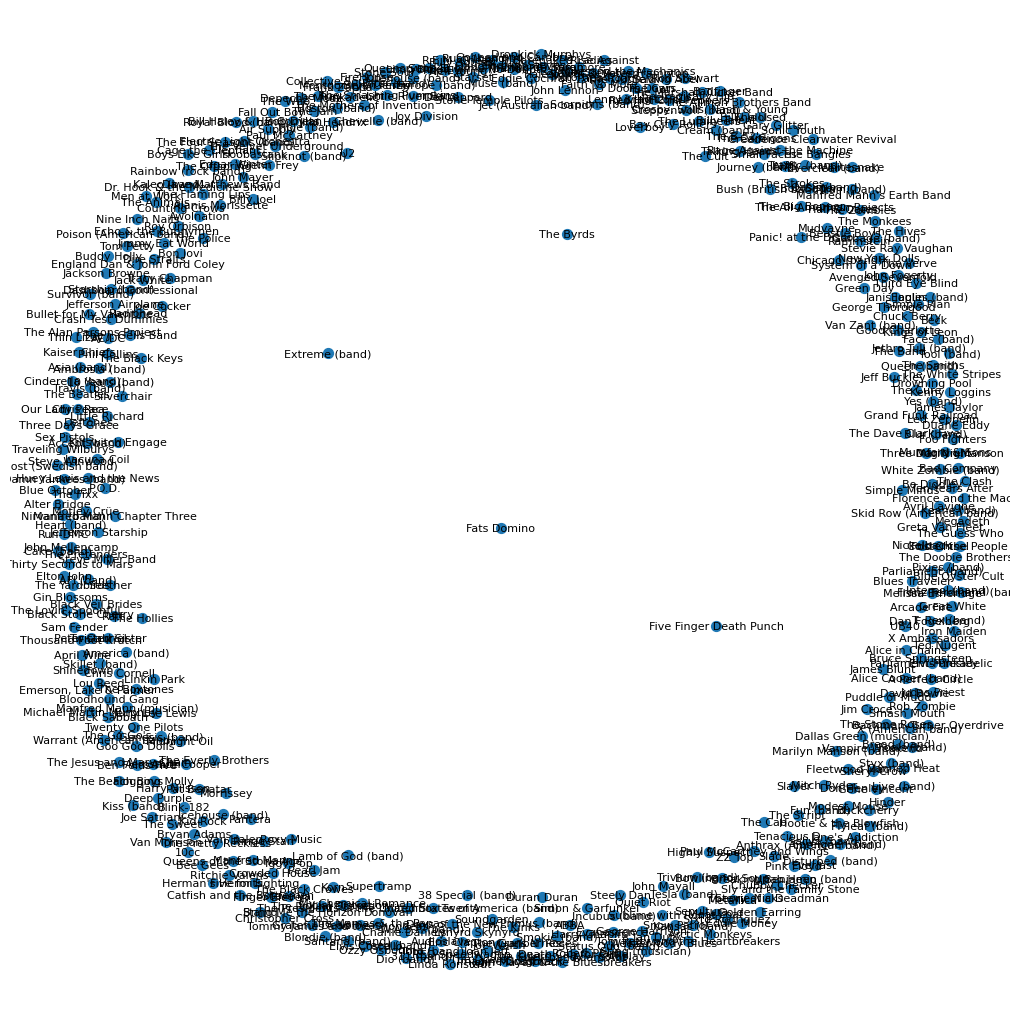

In [5]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.DiGraph()
G.add_nodes_from(titles)

#G.add_edges_from((("black sabbath", m) for m in matches))

plt.figure(figsize=(10,10))
nx.draw(G, with_labels=True, node_size=50, font_size=8) 

now I just need to do it for all the artists



In [6]:
for artist in titles:
    with open(f"C:\\Users\\Jacob pc\\vscode_projects\\socialgraphs2025\\lectures\\artists_wikitext\\{artist.replace('/','／')}.txt", "r", encoding="utf-8") as file:
        artist_text = file.read()
    artist_matches = extract_performer_links(artist_text)
    G.add_edges_from(((artist, m) for m in artist_matches if m != artist))



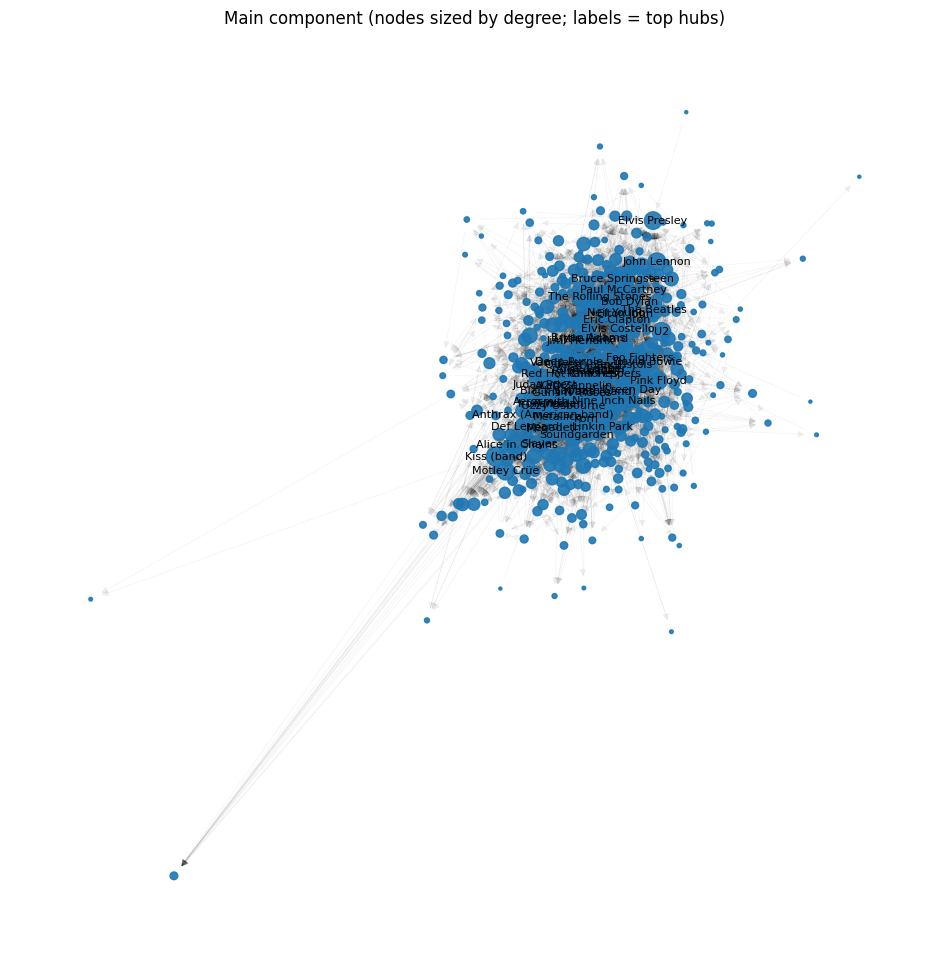

In [7]:
H = G.subgraph(max(nx.weakly_connected_components(G), key=len))

# 2) Node sizes by degree (out+in)
deg = dict(H.degree())
sizes = [3 + 2*deg[n] for n in H.nodes()]  # tweak multipliers to taste


top = set(sorted(deg, key=deg.get, reverse=True)[:50])
labels = {n: n for n in top}

# 4) Layout + draw
pos = nx.spring_layout(H, k=0.15, iterations=50, seed=7)
plt.figure(figsize=(12, 12))
nx.draw_networkx_edges(H, pos, alpha=0.05, width=0.5)
nx.draw_networkx_nodes(H, pos, node_size=sizes, alpha=0.9)
nx.draw_networkx_labels(H, pos, labels=labels, font_size=8)
plt.axis("off")
plt.title("Main component (nodes sized by degree; labels = top hubs)")
plt.show()

In [9]:
import pickle


# Save the graph
with open("rock_music_network.pkl", "wb") as f:
    pickle.dump(G, f)

*Excercise*: 
> * Document how you crawled the network.
>    * First, simply describe the steps of the process (what you did, step by step)
>    * Then, write a short section about which part of the process that was most difficult
>    * Next write a short section about how you used LLMs to help you
>    * Finally, compose a short section about what you would do differently if you had to do it again
<div class="alert alert-block alert-info">
Use your own words here. Writing makes you better at thinking! Train that brain.
</div>



*Exercise*: Simple network statistics and analysis

> * What is the number of nodes in the network? 
> * More importantly, what is the number of links? (Chat with a fellow student or a TA to make sure you're in the right ball-park)
> * Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?
>     * Compare the out-degree distribution to a *random network* with the same number of nodes and links.
>     * Compare the in-degree distribution to a *scale-free* network with the same number of nodes.
> * Who are the top 5 most connected performers (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)? Comment on your findings. Is this what you would have expected?
> * What are the 10 pages with the longest wiki entries? (use the `length of content` attribute to figure this one out)?

<div class="alert alert-block alert-info">
For this exercise, I hope you'll do everything yourself. This is a part where you learn something by writing the code.
</div>

Number of nodes: 484
Number of edges: 7331


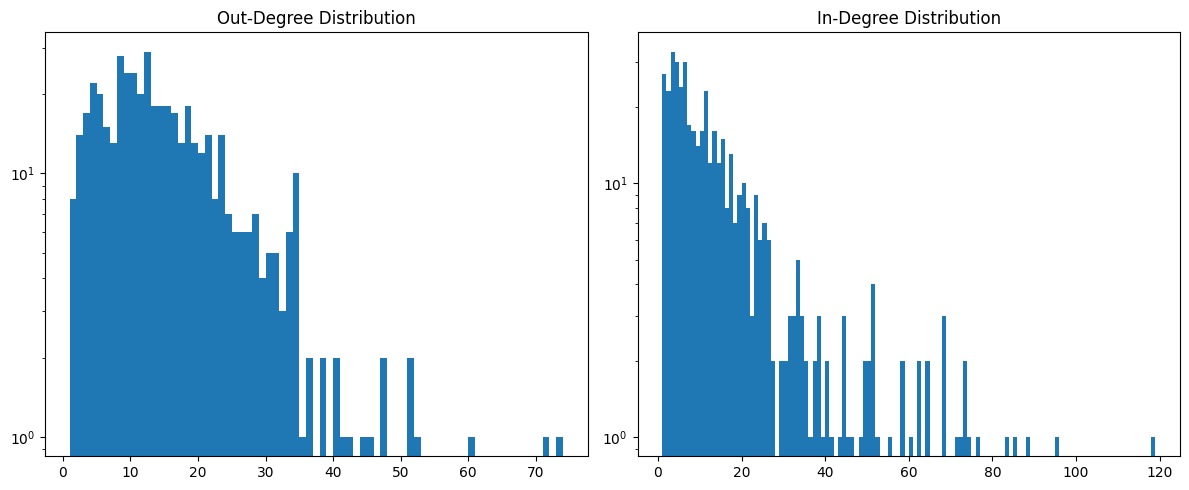

Top 5 by In-Degree: [('Led Zeppelin', 119), ('Bob Dylan', 95), ('Queen (band)', 88), ('Metallica', 85), ('David Bowie', 83)]
Top 5 by Out-Degree: [('Alice in Chains', 74), ('Deep Purple', 71), ('Black Sabbath', 60), ('Def Leppard', 52), ('Bryan Adams', 51)]


In [50]:
# number of nodes
print("Number of nodes:", H.number_of_nodes())
print("Number of edges:", H.number_of_edges())

# indegree and outdegree distributions
in_deg = H.in_degree()
out_deg = H.out_degree()


# plot in and out degree distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.hist([d for n, d in in_deg], bins=range(1, max(dict(in_deg).values()) + 1), log=True)
plt.title("In-Degree Distribution")

plt.subplot(1, 2, 1)
plt.hist([d for n, d in out_deg], bins=range(1, max(dict(out_deg).values()) + 1), log=True)
plt.title("Out-Degree Distribution")

plt.tight_layout()
plt.show()

# top 5 by indegree
top5_in = sorted(in_deg, key=lambda x: x[1], reverse=True)[:5]
print("Top 5 by In-Degree:", top5_in)

# top 5 by outdegree
top5_out = sorted(out_deg, key=lambda x: x[1], reverse=True)[:5]
print("Top 5 by Out-Degree:", top5_out)

# Part 3: Visualizing the networks

*Exercise:* Let's build a simple visualization of the network
>1. For the sake of the visualisation, let's convert our network to *undirected graph* (tip: There is a NetworkX command to help you).
>   * *Note*: Keep the directed graph, we will use it in the following exercises.
>2. Use the NetworkX command `nx.spring_layout` or `nx.draw_kamada_kawai` to draw the resulting undirected network. (You can find [background on the algorithms here](https://en.wikipedia.org/wiki/Force-directed_graph_drawing).)  
>   * Set up your plot so that node-size depends on the node *degree*.
>   * Make the node color depend on the `length of content` attribute. I recommend choosing a color scheme that is quite simple (e.g. the Sequential ones here: https://matplotlib.org/stable/users/explain/colors/colormaps.html)

<div class="alert alert-block alert-info">
For this exercise, I hope you'll do almost everything yourself. But it's OK to use an LLM for help with the coloring.
</div>

If you want to make things more fancy, note that Wikipedia writes that local minima is a problem for these graphs: "It is easy to see that force-directed algorithms produce a graph with minimal energy, in particular one whose total energy is only a local minimum. The local minimum found can be, in many cases, considerably worse than a global minimum, which translates into a low-quality drawing. For many algorithms, especially the ones that allow only down-hill moves of the vertices, the final result can be strongly influenced by the initial layout, that in most cases is randomly generated. The problem of poor local minima becomes more important as the number of vertices of the graph increases. **A combined application of different algorithms is helpful to solve this problem**. For example, using the Kamada–Kawai algorithm to quickly generate a reasonable initial layout and then the Fruchterman–Reingold algorithm to improve the placement of neighbouring nodes." (my emphasis) 

But don't worry if your network looks like a hairball (a.k.a a *ridiculogram*) for now, we'll dig deeper with visualization next time.

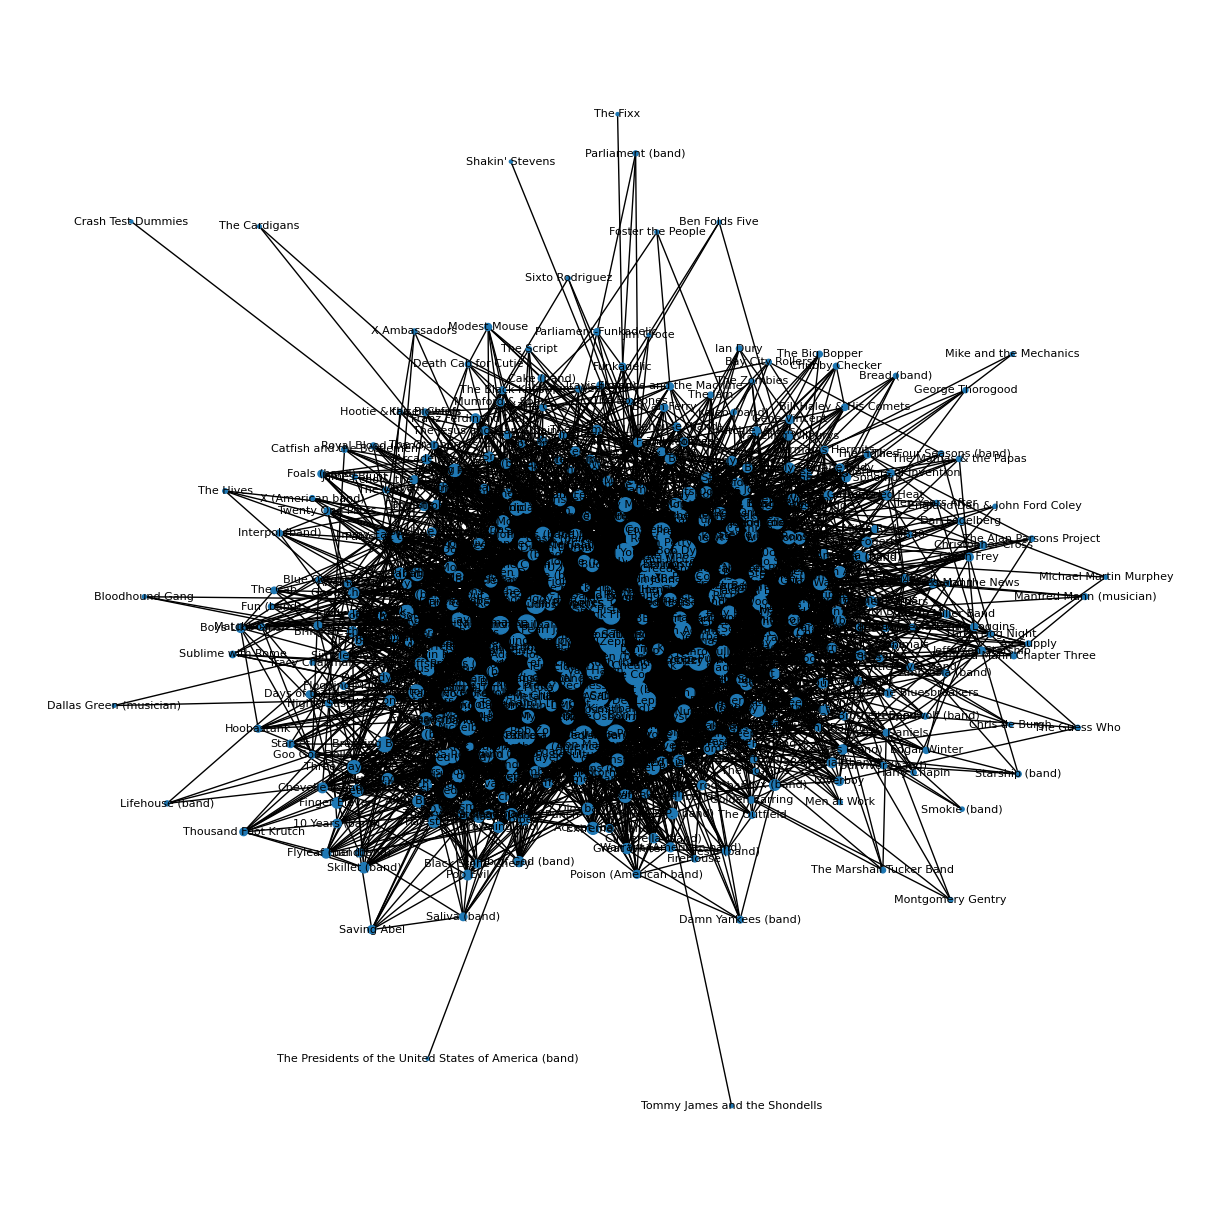

In [ ]:
undirected_H = H.to_undirected()

# draw the undirected graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(undirected_H)
deg = dict(H.degree())
sizes = [3 + 2*deg[n] for n in H.nodes()] 
nx.draw(undirected_H, pos, with_labels=True, node_size=sizes, font_size=8)


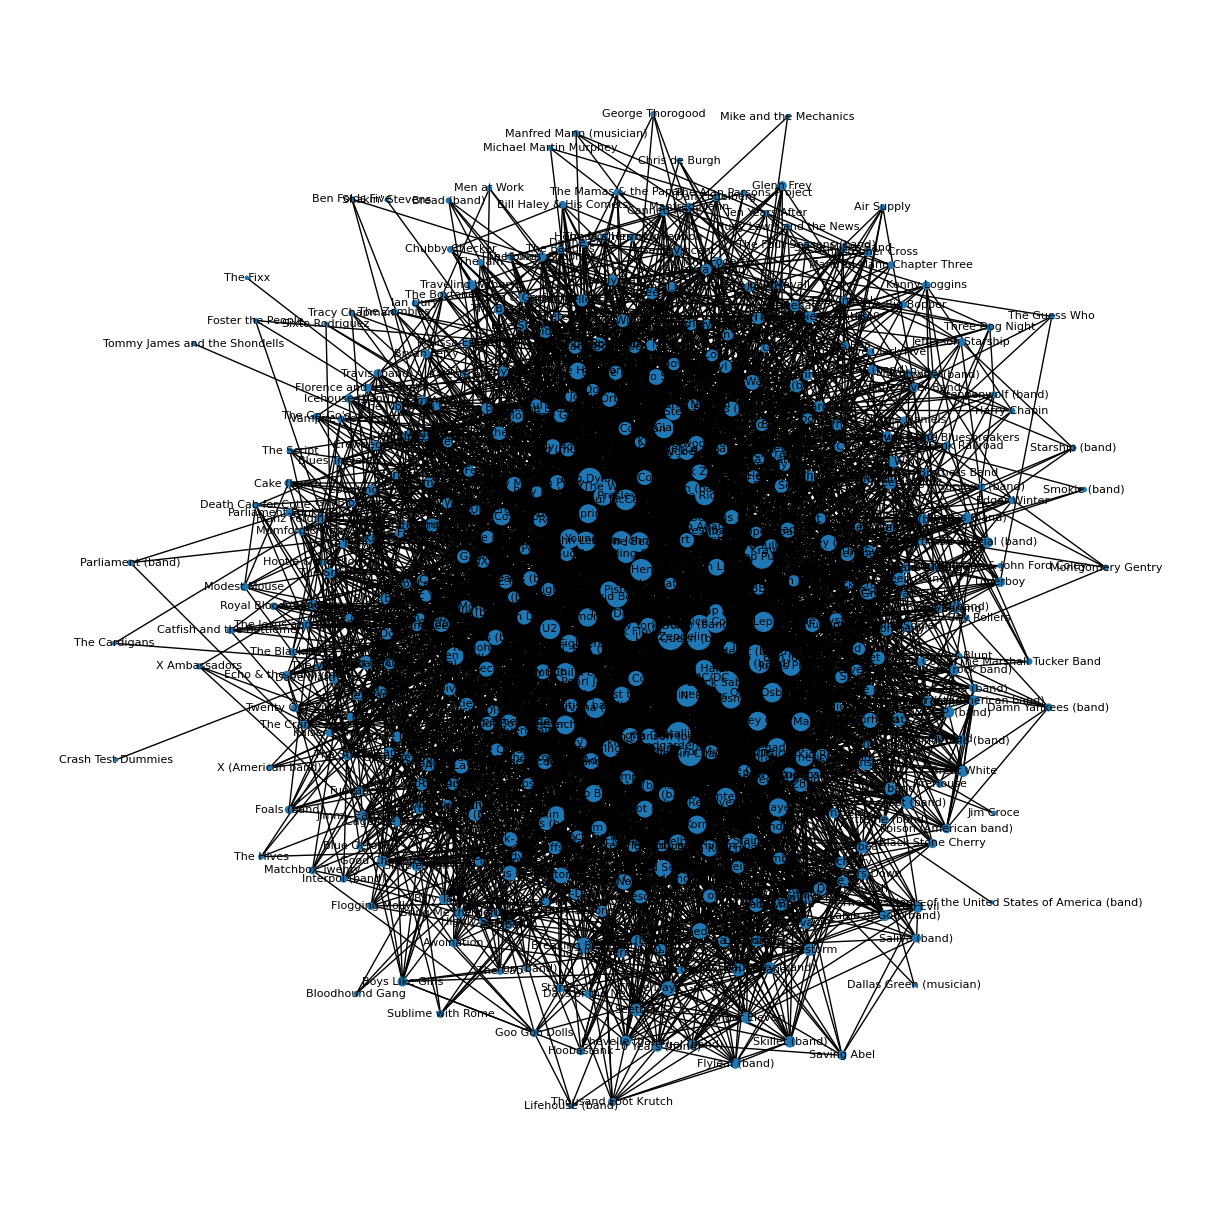

In [55]:
plt.figure(figsize=(12, 12))
pos = nx.kamada_kawai_layout(undirected_H)
deg = dict(H.degree())
sizes = [3 + 2*deg[n] for n in H.nodes()] 
nx.draw(undirected_H, pos, with_labels=True, node_size=sizes, font_size=8)